### ARIMA Forecast Model For Apple Stock 2013-2018

This project uses Apple Stock data from 2013-2018 to create a ARIMA model to forecast the monthly price for the 2019 calendar year.  The model can be used to predict other stocks and other publicly traded equities.

## <span style="color:green">Contents</span> 

**Monthly Forecasting**

**-Stationarity Check**

**-log Transformation to achieve stationarity** 

**-Differencing and Seasonal Decomposition to check series for trend, seaonality and noise.**   

**-Autocorrelation and Partial Autocorrelation Functions to determine p and q terms for ARIMA**

**-Use p,d,q to create ARIMA model on timeseries** 
        **-Analysis of Results**
        **-PredictionARIMA**

## Step 1:

**1. Import Libraries** -

**2. Import Dataset and set date as index** 

**3. Filter dataset to inlucde only close price** 

**4. Resample from daily to Monthly close price** 

In [2]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

#import dataset and set date as index
dataset = pd.read_csv(r"C:\Users\stran\Documents\springboard projects\Capstone 2\Raw dataset\AAPL_data.csv")

#parse strings to datetime type
dataset['date'] = pd.to_datetime(dataset['date'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['date'])


# Filter to only include close price from dataframe
df_close = indexedDataset['close']
df_close.head(15)

date
2013-02-08    67.8542
2013-02-11    68.5614
2013-02-12    66.8428
2013-02-13    66.7156
2013-02-14    66.6556
2013-02-15    65.7371
2013-02-19    65.7128
2013-02-20    64.1214
2013-02-21    63.7228
2013-02-22    64.4014
2013-02-25    63.2571
2013-02-26    64.1385
2013-02-27    63.5099
2013-02-28    63.0571
2013-03-01    61.4957
Name: close, dtype: float64

In [3]:
#Resampling to monthly frequency
df_monthlyclose = df_close.resample('M').mean()
df_monthlyclose.head(15)

date
2013-02-28    65.306264
2013-03-31    63.120110
2013-04-30    59.966432
2013-05-31    63.778927
2013-06-30    60.791120
2013-07-31    61.308064
2013-08-31    69.263227
2013-09-30    68.597725
2013-10-31    72.106270
2013-11-30    74.945135
2013-12-31    79.951033
2014-01-31    76.777876
2014-02-28    75.225637
2014-03-31    76.173400
2014-04-30    77.296243
Freq: M, Name: close, dtype: float64

# Before Checking for Stationarity of original Timseries, it's important to get a sense of the series descriptive statistics:

**Plot standard deviation of original series agains moving average:

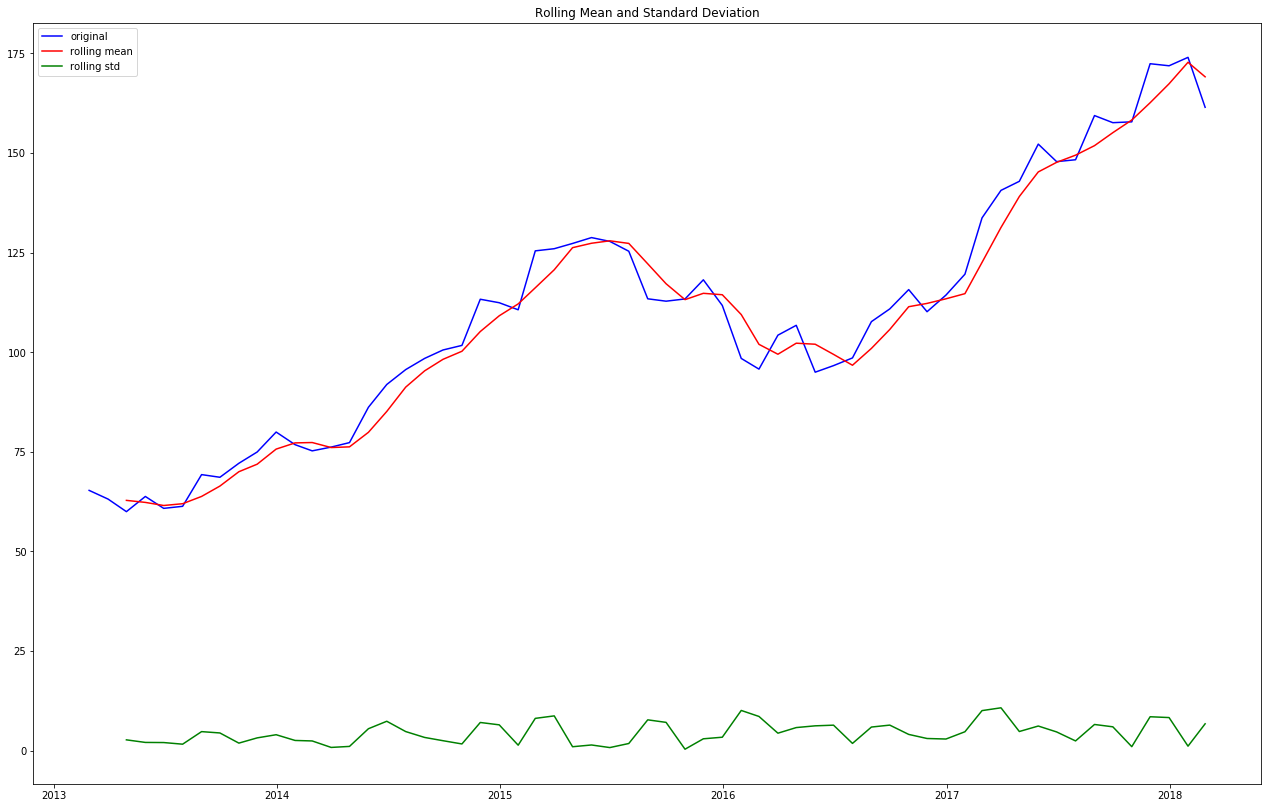

In [5]:
#Calculate and plot the rolling mean and rolling std:
#NON Stationary, so must be made stationary, calculate rolmean and std Quarterly
rolmean = df_monthlyclose.rolling(window=3).mean()
rolstd = df_monthlyclose.rolling(window=3).std()


#Plot the rolmean and std against apple's monthly close price
orig = plt.plot(df_monthlyclose, color='blue', label='original')
mean = plt.plot(rolmean, color='red', label='rolling mean')
std = plt.plot(rolstd, color='green', label='rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.rcParams['figure.figsize'] = (22,14)
plt.show(block=False)

## Key Insights:

**Just by glancing at the original series, we can visualize a linear trend line that suggests a unpward trend over time, suggesting this series is not stationary.**

## Executive Headline: Using Dickey Fuller test on the original series and it's rolling statistics, we can determine it's stationarity with the p-value and critical value results.

## Use Dickey Fuller:

**Check P-Value < 0.05**
**Check Test Statistic against Critical Value**

In [6]:
#go over this with solomon in next class

from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(df_monthlyclose, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '#lags used', 'number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test:
test statistic                 -0.493811
p-value                         0.893219
#lags used                      0.000000
number of observations used    60.000000
critical value (1%)            -3.544369
critical value (5%)            -2.911073
critical value (10%)           -2.593190
dtype: float64


## Key Insights:

**1) The Results of our Dickey Fuller test on the original series shows a p-value of 0.89, far larger than the 0.05 threshold needed to suggest stationarity. 2) Additionally, our test statistic of -0.49 is far larger than our 5% critical value needed to suggest stationarity. 3)Our original series is not stationary and must be transformed into a stationary series through additional methods.

## Executive Headline: Given our original timeseries is not stationary, we need to apply transformation methods to eliminate trend and seasonality in order to make the timeseries stationary.

## Transform:
**Use common mehtod of transformation called log transformation:

Text(0.5, 1.0, 'Apple Close Price LogScale')

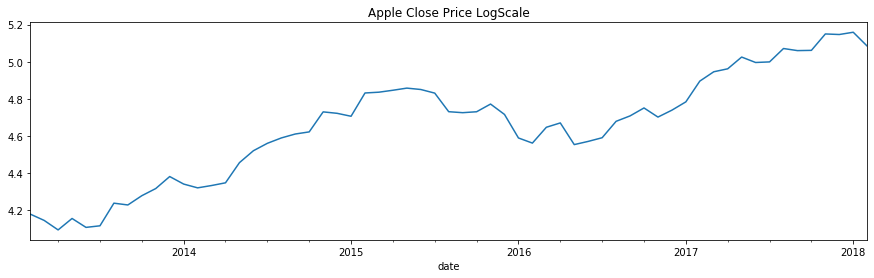

In [8]:
#Since non stationary, we have to estimate it using log
df_monthlyclose_logScale = np.log(df_monthlyclose)
df_monthlyclose_logScale.plot(figsize=(15,4)).set_title('Apple Close Price LogScale')
#or plt.plot(df_close_logScale)

## Take the mean and Std of Apple's LogScale Result 

**graph Apple's Logscale against Apple's moving average logscale

**In this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and one of most common mehtods used is:*

**Moving average
In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 3 months, i.e. last 3 values. Pandas has specific functions defined for determining rolling statistics.**

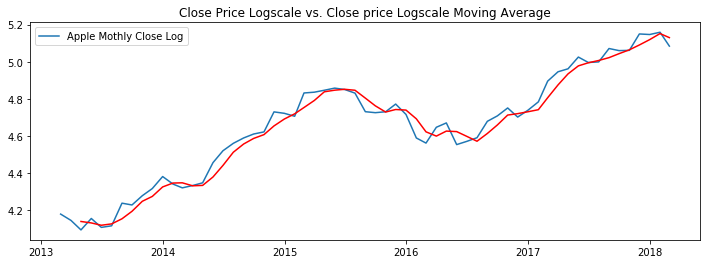

In [10]:
movingAverage = df_monthlyclose_logScale.rolling(window=3).mean()
movingStd = df_monthlyclose_logScale.rolling(window=3).std()
plt.plot(df_monthlyclose_logScale, label='Apple Mothly Close Log')
plt.plot(movingAverage, color='red')
plt.rcParams['figure.figsize'] = (12,4)
plt.title('Close Price Logscale vs. Close price Logscale Moving Average')
plt.legend(loc='best')

plt.savefig('Logscale.png')

** While the Scale of the original timeseries has been largely reduced in scale through log transformation, we still see trend. The next part to reduce the trend and seasonality is to take the difference between the logscale of the series the logscale of the moving average.

In [11]:
dfLogScaleminusMovingAvg = df_monthlyclose_logScale - movingAverage
dfLogScaleminusMovingAvg.head(12)

#remove Nan values
dfLogScaleminusMovingAvg.dropna(inplace=True)
dfLogScaleminusMovingAvg.head()

date
2013-04-30   -0.045519
2013-05-31    0.024007
2013-06-30   -0.011440
2013-07-31   -0.010348
2013-08-31    0.084158
Freq: M, Name: close, dtype: float64

**Finally, check the stationary of the logscale difference using Dickey Fuller test to see if our transformation has made the series stationary.

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries): 
    
    #determining Rollings stats
    movingAverage = timeseries.rolling(window=3).mean()
    movingSTD = timeseries.rolling(window=3).std()
    
    #plot rolling statistics 
    orig = plt.plot(timeseries, color='blue', label='orginal')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label ='Rolling std')
    plt.legend(loc='best')
    plt.title('Roling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform Dickey-Fuller Test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statstic', 'P-value', '#Lags used', 'Number of Observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)
  

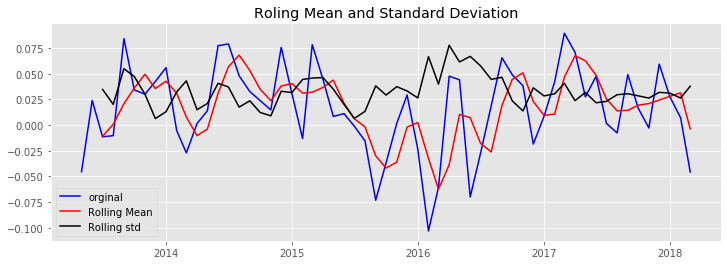

Results of Dickey-Fuller Test:
Test Statstic             -3.522134
P-value                    0.007437
#Lags used                 2.000000
Number of Observations    56.000000
Critical value (1%)       -3.552928
Critical value (5%)       -2.914731
Critical value (10%)      -2.595137
dtype: float64


In [68]:
test_stationarity(dfLogScaleminusMovingAvg) 

## Key Insights:

**1) After taking the log of the original series and differencing this with the moving average log, we see the p-value of our series is now 0..0074, suggesting it's now stationary. 2) Additionally, our 5% critical value is now greater than our -3.52 test statistic, also suggesting stationary. 3) In conclusion, we've suggesfully used logscale transformation to make the series stationary and can now move on to differencing the log result in order to use seasonal decompose to identify trend, seasonality and noise in the transformed series.

## Executive Headline: Using differencing of our logscaled result, we can deal with and reduce seasonality and trend

Note: Differencing – taking the differece with a particular time lag Decomposition – modeling both trend and seasonality and removing them from the model. Differencing One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:**

## 1:  
calculate the difference between Apple's monthly close logscale and it's shifted counterpart and create a new variable.

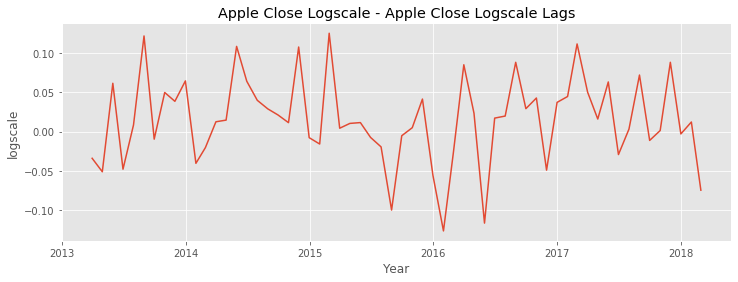

In [69]:
df_closeLogDiffShifting = df_monthlyclose_logScale - df_monthlyclose_logScale.shift()
plt.title('Apple Close Logscale - Apple Close Logscale Lags')
plt.ylabel('logscale')
plt.xlabel('Year')
plt.plot(df_closeLogDiffShifting)

## 2: test the stationarity of the result usinig dicky fuller

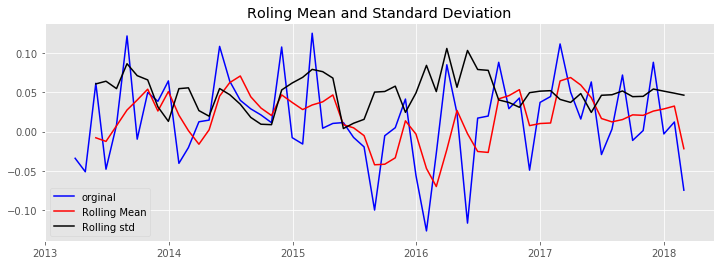

Results of Dickey-Fuller Test:
Test Statstic            -6.907061e+00
P-value                   1.239468e-09
#Lags used                0.000000e+00
Number of Observations    5.900000e+01
Critical value (1%)      -3.546395e+00
Critical value (5%)      -2.911939e+00
Critical value (10%)     -2.593652e+00
dtype: float64


In [70]:
df_closeLogDiffShifting.dropna(inplace=True)
test_stationarity(df_closeLogDiffShifting)

## Key Insights:

1) After using differencing of the lags of our logscaled timeseries, we can see from our dickey fuller results that the time series has largely reduced it's p-value to 1.23e-09 an dour 1% critical value is far larger than our test statistic. 2) This suggests that we have successfully removed trend and seasonality from the orgiginal series through log transformation and 1st order differencing of the log transformation.

# Use Seasonal Decompose to plot the trend, sesonality and residuals

Dickey–Fuller test: p=0.000000


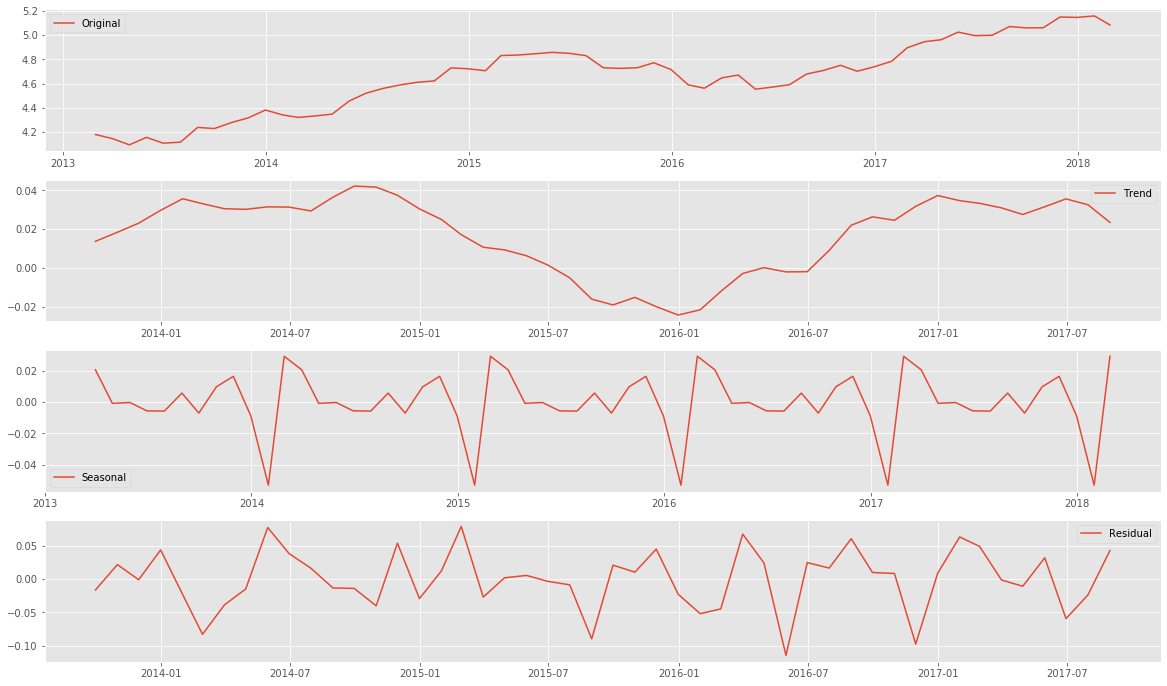

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_closeLogDiffShifting) #df_monthlyclose_logScale dfLogScaleminusMovingAvg df_closeLogDiffShifting

trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_monthlyclose_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

print("Dickey–Fuller test: p=%f" % adfuller(df_closeLogDiffShifting)[1])


plt.rcParams['figure.figsize'] = 20,12
plt.show()

## Here we can see that the trend, seasonality are separated out from data and we can model the residuals. Lets check stationarity of residuals:

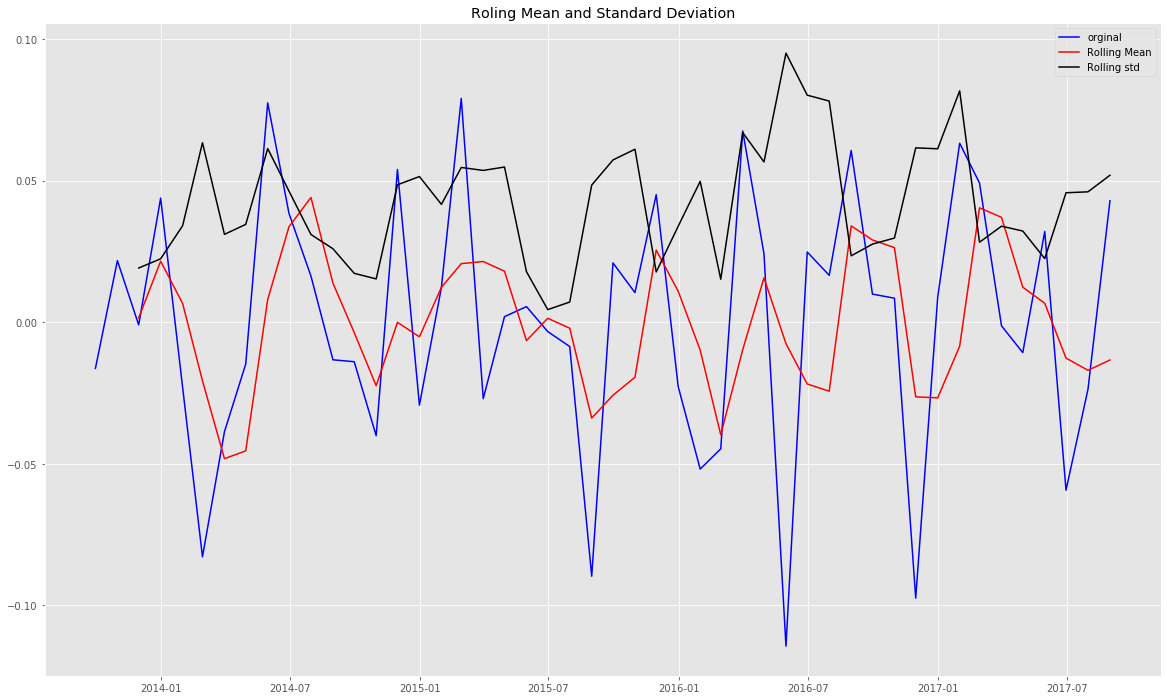

Results of Dickey-Fuller Test:
Test Statstic            -6.089116e+00
P-value                   1.046841e-07
#Lags used                2.000000e+00
Number of Observations    4.500000e+01
Critical value (1%)      -3.584829e+00
Critical value (5%)      -2.928299e+00
Critical value (10%)     -2.602344e+00
dtype: float64


In [72]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

## Key Insights:
**The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. You can try advanced decomposition techniques as well which can generate better results. Also, you should note that converting the residuals into original values for future data in not very intuitive in this case.**

   ## Executive Headline: Using the ACF and PACF, we can find the number of the p and  q terms needed for our ARIMA model.

In [205]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

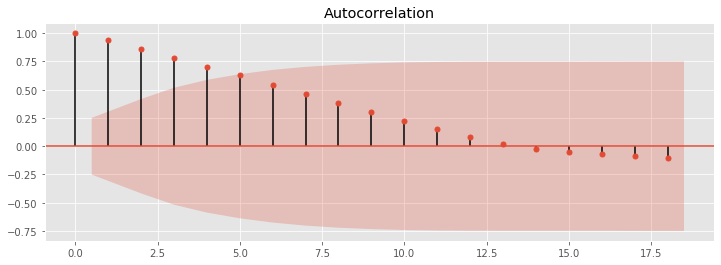

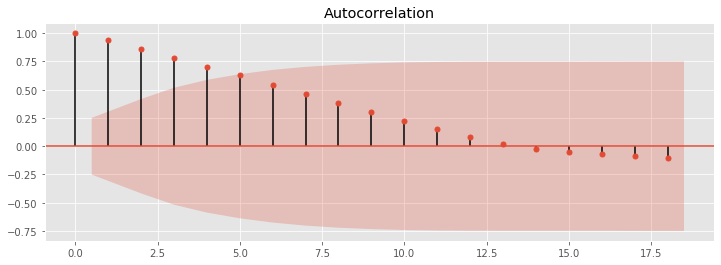

In [206]:
#plot acf to determine q parameter
#ARIMA (p,d,q)

plot_acf(df_monthlyclose)

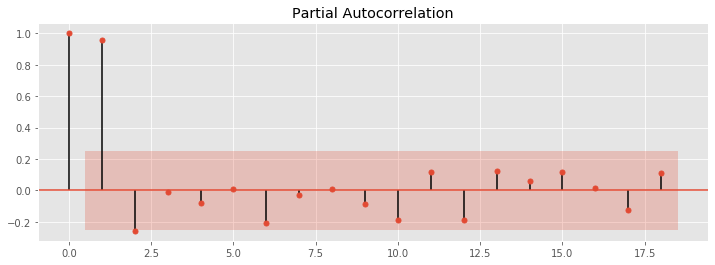

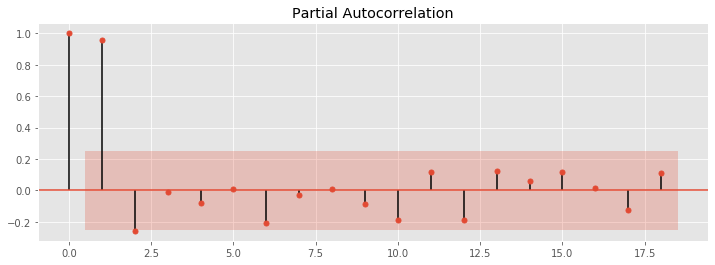

In [207]:
#plot pacf to determine p parameter
#ARIMA(p,d,q)

plot_pacf(df_monthlyclose)

## Key Insights:

**In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=10 to 12.
q – The lag value where the PACF chart crosses the lower confidence interval for the first time. If you notice closely, in this case q= 6.
Now, lets make an ARIMA model with these results. I will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.**

   ## Executive Headline: Using our PACF result of q=6 and ACF result of p=10, we can create our ARIMA model.

We need to load the ARIMA model first:

In [208]:
from statsmodels.tsa.arima_model import ARIMA

The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q). Let model the 3 cases:

## AR model

Text(0.5, 1.0, 'RSS: 0.1580')

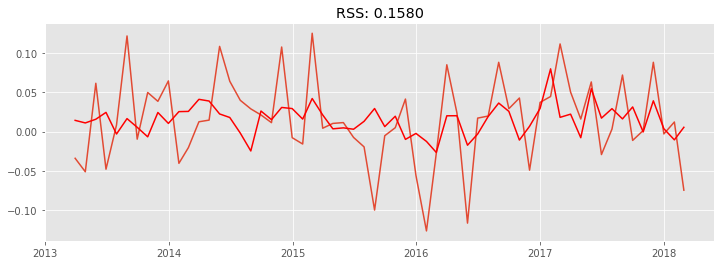

In [209]:
model = ARIMA(df_monthlyclose_logScale, order=(12, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(df_closeLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_closeLogDiffShifting)**2))

## MA Model

Text(0.5, 1.0, 'RSS: 0.1598')

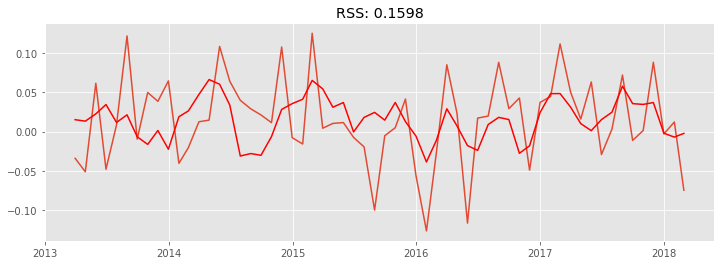

In [210]:
model = ARIMA(df_monthlyclose_logScale, order=(0, 1, 6))  
results_MA = model.fit(disp=-1)  
plt.plot(df_closeLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df_closeLogDiffShifting)**2))

## Combined ARIMA Model:

C:\Users\stran\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                   60
Model:                ARIMA(12, 1, 6)   Log Likelihood                 101.886
Method:                       css-mle   S.D. of innovations              0.039
Date:                Sat, 23 May 2020   AIC                           -163.772
Time:                        13:37:15   BIC                           -121.885
Sample:                    03-31-2013   HQIC                          -147.387
                         - 02-28-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0150      0.006      2.677      0.011       0.004       0.026
ar.L1.D.close      0.8230      0.263      3.123      0.003       0.307       1.339
ar.L2.D.close      0.0440      0.270      0.163      0.872      -0.485       0.573
ar.L3.D.close     -0.4572      0.279     -1.636      0.109      -1.005       0.090
ar.L4.D.close     -0.1479      0.252     -0.586      0.561      -0.643       0.347
ar.L5.D.close      0.6415      0.224      2.866      0.007       0.203       1.080
ar.L6.D.close     -0.4033      0.261     -1.548      0.129      -0.914       0.107
ar.L7.D.close      0.1540      0.211      0.731      0.469      -0.259       0.567
ar.L8.D.close     -0.0664      0.198     -0.336      0.739      -0.454       0.321
ar.L9.D.close      0.1836      0.210      0.872      0.388      -0.229       0.596
ar.L10.D.close    -0.1723      0.200     -0.863      0.393      -0.563       0.219
ar.L11.D.close     0.0918      0.212      0.432      0.668      -0.325       0.508
ar.L12.D.close    -0.2966      0.173     -1.714      0.094      -0.636       0.043
ma.L1.D.close     -1.0213      0.268     -3.816      0.000      -1.546      -0.497
ma.L2.D.close     -0.2951      0.315     -0.936      0.355      -0.913       0.323
ma.L3.D.close      0.9774      0.324      3.014      0.004       0.342       1.613
ma.L4.D.close      0.2897      0.345      0.839      0.407      -0.387       0.967
ma.L5.D.close     -1.0127      0.287     -3.534      0.001      -1.574      -0.451
ma.L6.D.close      0.7130      0.291      2.450      0.019       0.143       1.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0175           -0.2349j            1.0443           -0.0361
AR.2             1.0175           +0.2349j            1.0443            0.0361
AR.3             0.7402           -0.6902j            1.0121           -0.1194
AR.4             0.7402           +0.6902j            1.0121            0.1194
AR.5             0.4183           -0.9898j            1.0746           -0.1864
AR.6             0.4183           +0.9898j            1.0746            0.1864
AR.7            -0.9760           -0.4205j            1.0627           -0.4353
AR.8            -0.9760           +0.4205j            1.0627            0.4353
AR.9            -0.8450           -0.7982j            1.1624           -0.3795
AR.10           -0.8450           +0.7982j            1.1624            0.3795
AR.11           -0.2003           -1.2933j            1.3087           -0.2745
AR.12           -0.2003           +1.2933j            1.3087            0.2745
MA.1            -0.8640           -0.5035j            1.0000           -0.4160
MA.2            -0.8640           +0.5035j            1.0000            

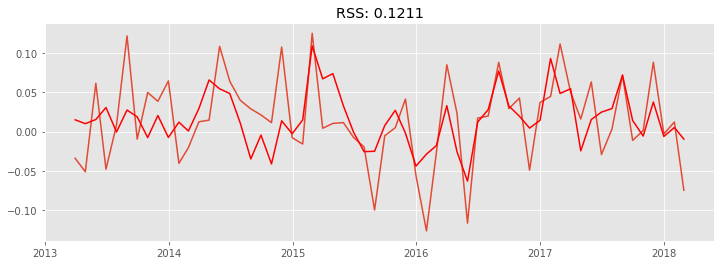

In [211]:
model = ARIMA(df_monthlyclose_logScale, order=(12, 1, 6))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_closeLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_closeLogDiffShifting)**2))
results_ARIMA.summary()

## Key Insights:

 1) Our first AR model, which only took in the p=12 term, had a RSS of 0.158. 2) Our MA model, which only took in the q=6 term had an RSS of 0.1598. 3) Our combined ARIMA model using ordder (12,1,6) produced the lowest and best RSS of 0.1211

## Executive Headline: How that we've optimized our model and found the best ordering of our AR an MA terms, we now have to scale the data back to it's original series.

## Taking it back to original scale

Since the combined model gave best result, lets scale it back to the original values and see how well it performs there. First step would be to store the predicted results as a separate series and observe it.

In [212]:
#results_ARIMA.fittedvalues was used in combined ARIMA model
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
2013-03-31    0.015044
2013-04-30    0.010115
2013-05-31    0.015408
2013-06-30    0.030719
2013-07-31   -0.000541
Freq: M, dtype: float64

Notice that these start from ‘2013-03-31’ and not the first month. Why? This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from. The way to convert the differencing to log scale is to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. The cumulative sum can be found as:

In [213]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

date
2013-03-31    0.015044
2013-04-30    0.025158
2013-05-31    0.040567
2013-06-30    0.071286
2013-07-31    0.070745
Freq: M, dtype: float64

You can quickly do some back of mind calculations using previous output to check if these are correct. Next we’ve to add them to base number. For this lets create a series with all values as base number and add the differences to it. This can be done as:

In [214]:
predictions_ARIMA_log = pd.Series(df_monthlyclose_logScale.ix[0], index=df_monthlyclose_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\stran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2013-02-28    4.179088
2013-03-31    4.194132
2013-04-30    4.204246
2013-05-31    4.219655
2013-06-30    4.250374
Freq: M, dtype: float64

Here the first element is base number itself and from thereon the values cumulatively added. Last step is to take the exponent and compare with the original series:

Apples Monthly close standard deviation is: 31.112563895266323


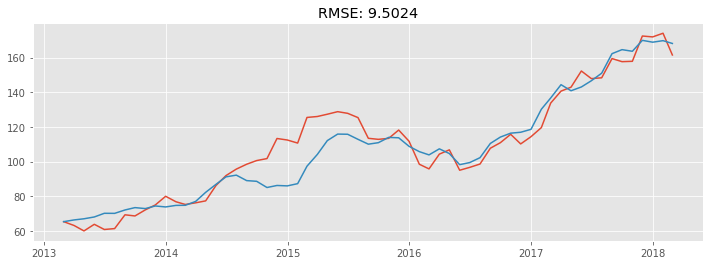

In [215]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_monthlyclose, label='Apple Monthly Close')
plt.plot(predictions_ARIMA, label='Forecasted Values')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df_monthlyclose)**2)/len(df_monthlyclose)))
std = df_monthlyclose.std()
print('Apples Monthly close standard deviation is:' + " " + str(std))
plt.rcParams['figure.figsize'] = 10,4

## Results and Key Insights:
1) After scaling the differenced and transformed data back to the original series, we get a RMSEe of 9.5, and a strong model which we can use to predict future outcomes.

## Capstone 2 Part 2: Use SP 500 timersies data as a benchmark for Apple's Actuals and its ARIMA Forecast Model

IMPORT SP 500 and Convert to Monthly for Excel Export

In [13]:
SP = pd.read_csv(r"C:\Users\stran\Documents\springboard projects\Capstone 2\Raw dataset\SP500.csv")

SP['Date'] = pd.to_datetime(SP['Date'], infer_datetime_format=True)
indexedDataset = SP.set_index(['Date'])

SPmonthly = indexedDataset.resample('M').mean()

SPmonthly.head(10)

,Value
Date,
1977-09-30,96.3740
1977-10-31,93.6150
1977-11-30,94.8950
1977-12-31,94.3020
1978-01-31,89.9450
1978-02-28,89.0375
1978-03-31,89.0200
1978-04-30,93.5650
1978-05-31,97.3250


## Executive Headline: Using simple linear regression where y(x) = Apple Monthly close and x=SP 500 monthly close, we can determinte if there's a strong relationship between the two publically traded stocks. This will give us a sense if the SP500 is a good measure or benchmark to evaluate our stock's performance. 

In [14]:
#import dataset and set date as index
SPAppl = pd.read_excel(r"C:\Users\stran\Documents\springboard projects\Capstone 2\Raw dataset\SP500 and Apple Linear Regression and Normalize.xlsx")

#parse strings to datetime type
SPAppl['Month of Date1'] = pd.to_datetime(SPAppl['Month of Date1'], infer_datetime_format=True)
indexedDataset = SPAppl.set_index(['Month of Date1'])

In [15]:
y = indexedDataset['Close Actual']
x1 = indexedDataset['SP 500 Actuals']

# Next, add the regression line 
The Results Variable
Right after we do that, we will create another variable named results. It will contain the output of the ordinary least squares regression, or OLS. As arguments, we must add the dependent variable y and the newly defined x. At the end, we will need the .fit() method. It is a method that applies a 

In [16]:
import statsmodels.api as sm

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

C:\Users\stran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


That itself is enough to perform the regression.

Displaying the Regression Results
In any case, results.summary() will display the regression results and organize them into three tables.

In [17]:
x = sm.add_constant(x1)
 
results = sm.OLS(y,x).fit()
 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Close Actual   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     401.6
Date:                Tue, 26 May 2020   Prob (F-statistic):           2.14e-26
Time:                        14:37:04   Log-Likelihood:                -197.72
No. Observations:                  55   AIC:                             399.4
Df Residuals:                      53   BIC:                             403.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -105.6722     10.500    -10.064      0.000    -126.733     -84.611
SP 500 Actuals     0.1042      0.005     20.039      0.000       0.094       0.115
==============================================================================
Omnibus:                        1.579   Durbin-Watson:                   0.307
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.135
Skew:                           0.013   Prob(JB):                        0.567
Kurtosis:                       2.297   Cond. No.                     1.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

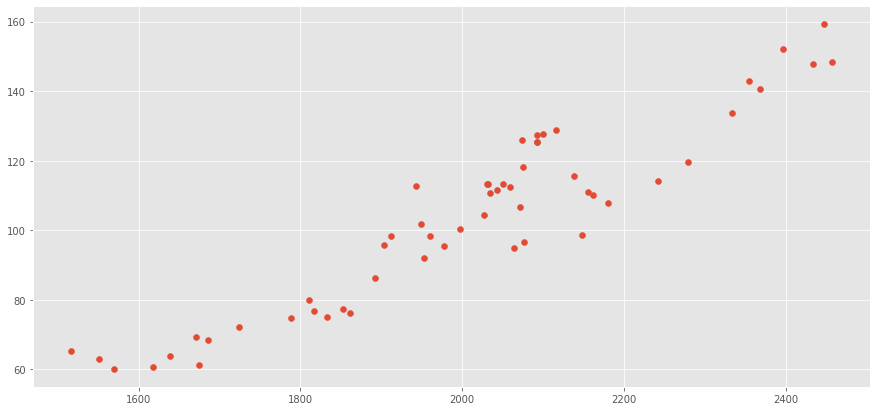

In [18]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')


plt.rcParams['figure.figsize'] = 15,7
plt.scatter(x1, y)
plt.show()

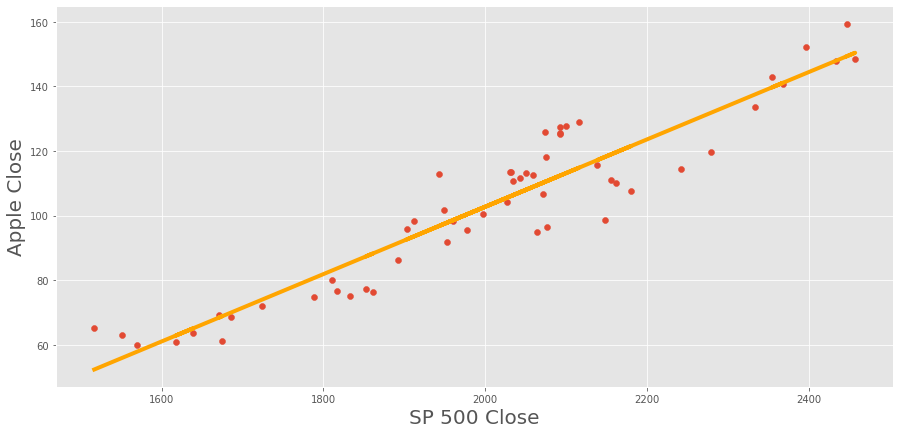

In [19]:
plt.scatter(x1,y)
 
yhat = 0.1042*x1 + -105.6722

fig = plt.plot(x1,yhat, lw=4, c='orange', label='regression line')
plt.xlabel('SP 500 Close', fontsize=20)
plt.ylabel('Apple Close', fontsize=20)
plt.show()
plt.rcParams['figure.figsize'] = 10,4

## Key Insights:

1) Using a simple OLS linear regression model with Apple’s closes price set as the dependent variable and the SP 500’s close price set as the dependent variable, we generated a linear model with a 0.883 R-squared result, suggesting that our model explains 88.3% of the residual error of the data around the fitted regression line.  

2) Additionally, our P-Value for the constant and independent variable SP500, or x variable, is 0.000, suggesting the statistical relevance and significance of these coefficients. These help use further conclude the strength of our model. 

## Executive Headline: While our OLR linear regression model can explain 88.3% of the residual error of the fitted data, we also need to determine the correlation of Apple's stock next to our SP500 index.

Our R-Squared value only determines the fit of the model, however, we need to know the extent to which our SP500 index parallels the movment of our Apple stock using a correlation matrix seen below:

In [20]:
corrl = np.corrcoef(x1, y)
print(corrl)

[[1.         0.93989851]
 [0.93989851 1.        ]]


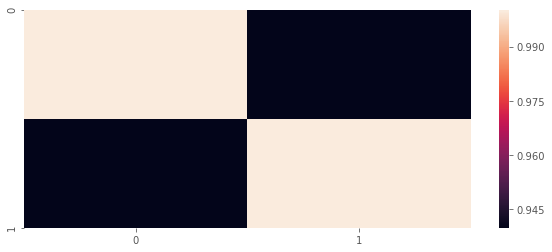

In [21]:
import seaborn as sns
ax = sns.heatmap(corrl)
plt.rcParams['figure.figsize'] = (12,4)
plt.show()

## Results:

Our matrix indicates a 0.93989 correlation between Apple Stock and the SP 500 index, suggesting that the two timeseriess' tend to move parallel to one another over time. Ergo, this suggests that the SP500 can be leveraged to predict and evaluate Apple's performance over time.

## Normalize the Data against the SP500 Index:  

First, use 6 month moving averages to smooth the trend of Apple stock, our ARiMA forecast and our SP500 index fund to visualize their paralell movement.

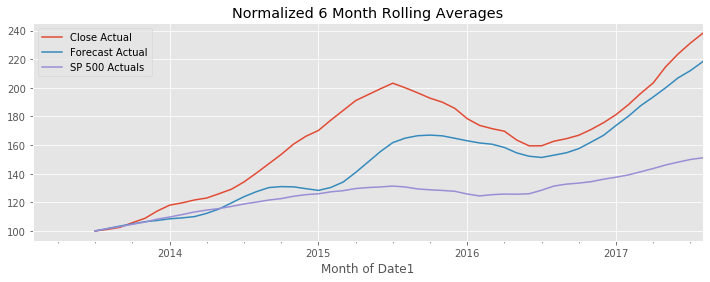

In [22]:
meanroll = indexedDataset.rolling(window=6).mean()
rollingmean = meanroll.iloc[5]
normalmeanroll = meanroll.div(rollingmean).mul(100)

normalmeanroll.plot(kind='line').set_title('Normalized 6 Month Rolling Averages')
plt.show()
plt.rcParams['figure.figsize'] = (18,8)

## Result:

As our correlation result of 0.94 indicated, we see clear parallel movement exhibited between our three timeseries models above. However, we see steeper curves from our apple closes and ARIMA model, this is largely because the SP500 indexes 500 publicaly traded stocks, and thus is remains more balanced and less volitile.

## Executive Headline: Although the raw data suggests that SP500 has the largest standard deviation, when we normalize the series to scale we see that relative to it's mean, it is our apple close that experiences the largest standard deviations from the norm. This suggest greater volatility, which translates to greater risk and reward.

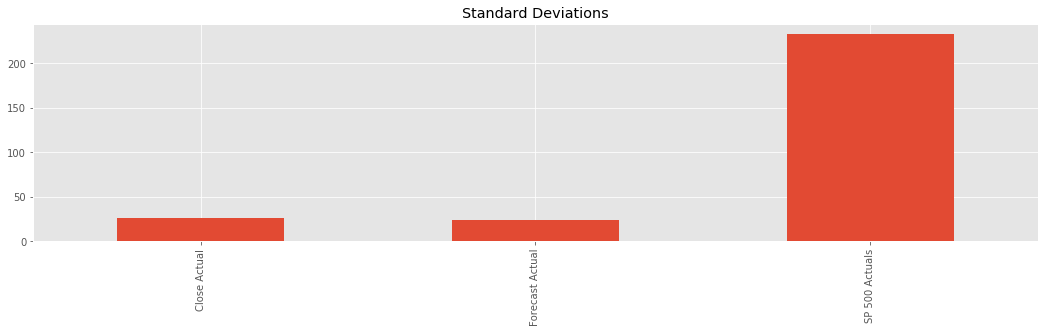

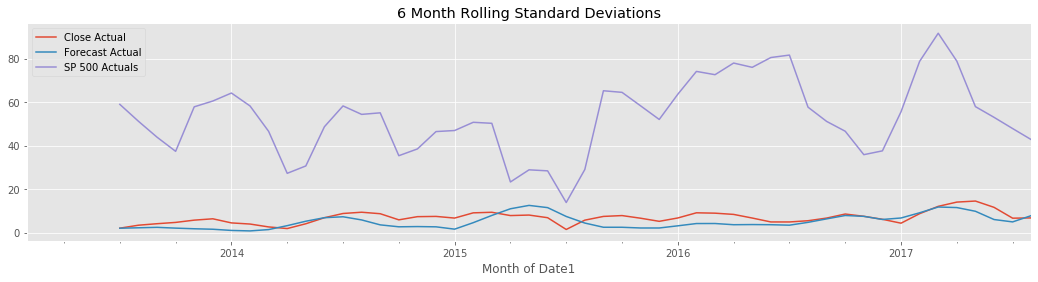

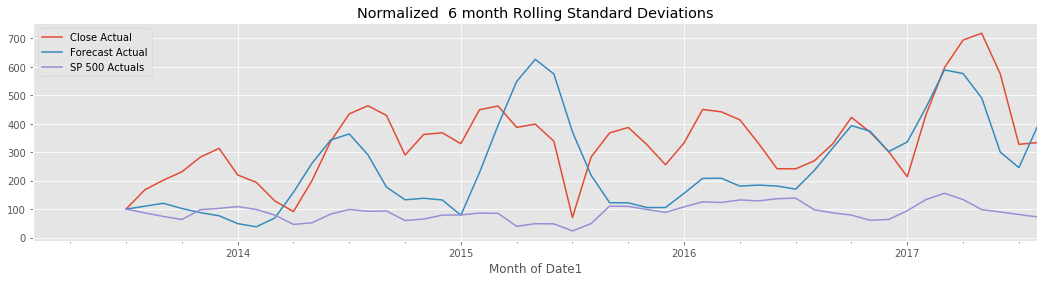

In [29]:
stddata = np.std(indexedDataset)
stdroll = indexedDataset.rolling(window=6).std()
rollstd = stdroll.iloc[5]
normalrollstd = stdroll.div(rollstd).mul(100)


stddata.plot(kind='bar').set_title('Standard Deviations')
stdroll.plot(kind='line').set_title('6 Month Rolling Standard Deviations')
normalrollstd.plot(kind='line').set_title('Normalized  6 month Rolling Standard Deviations')

plt.show()
plt.rcParams['figure.figsize'] = (12,4)

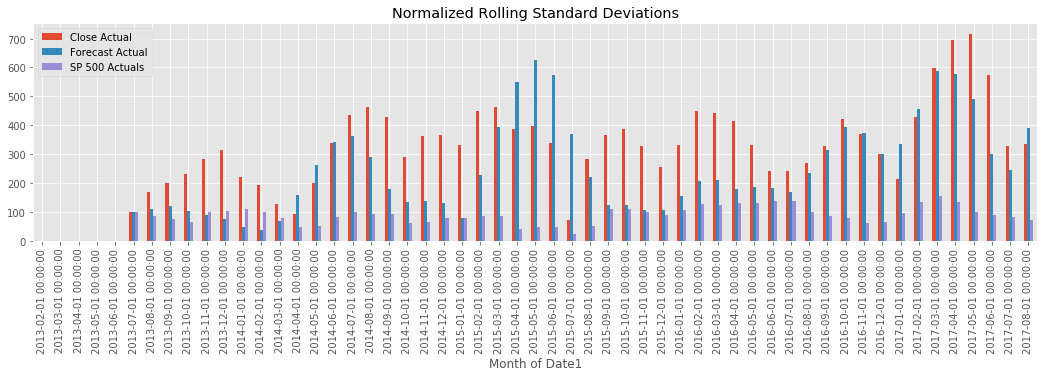

In [33]:
normalrollstd.plot(kind='bar').set_title('Normalized Rolling Standard Deviations')

plt.show()
plt.rcParams['figure.figsize'] = (18,4)

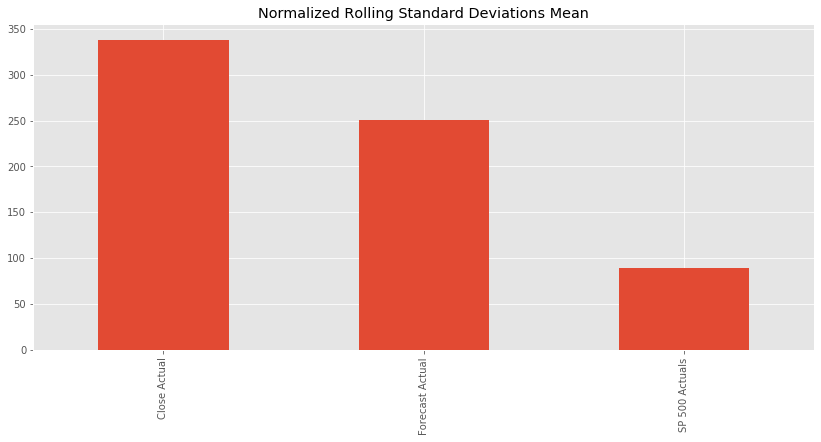

In [38]:
normalstdmean = normalrollstd.mean()
normalstdmean.plot(kind='bar').set_title('Normalized Rolling Standard Deviations Mean')
plt.rcParams['figure.figsize'] = (14,6)

## Result:

After visualizing our Apple stock, our ARIMA forecast and our SP500 standard deviations on a standardized scale, we learned that our Apple close is actually seeing the largest average standard deviation of just under 350, while our ARIMA saw an average standard deviation of 250, while our SP500 was somewhere around 90.  

Now that we learned that our ARIMA model and our Appple close prices saw the greater variabilty, let's now see how that translates to % growth, and thus yearly profits.

## Executive Headline: After normalizing our original Apple close, ARIMA and SP500 index to scale, we see that our ARIMA forecast and our Apple close price has outperformed our SP500 benchmark over the period of 2013-2017.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2013-02-01 to 2017-08-01
Data columns (total 3 columns):
Close Actual       55 non-null float64
Forecast Actual    55 non-null float64
SP 500 Actuals     55 non-null float64
dtypes: float64(3)
memory usage: 1.7 KB
None


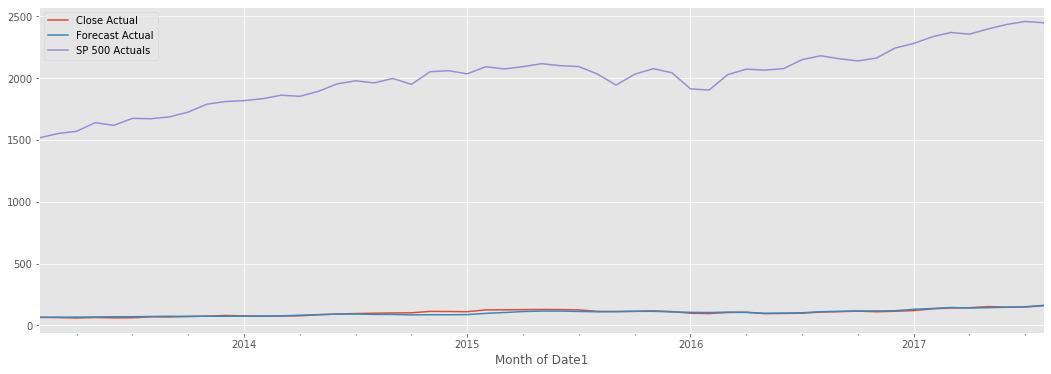

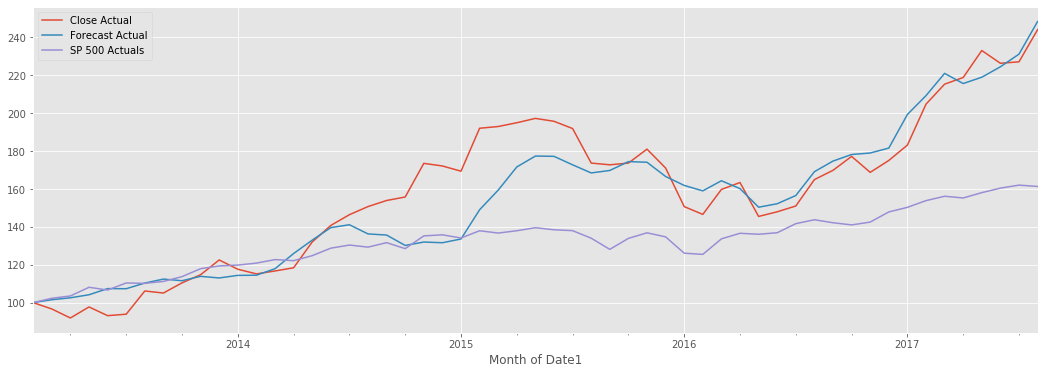

In [47]:
#Import data here

# Inspect prices here
print(indexedDataset.info())

# Select first prices
first_prices = indexedDataset.iloc[0]

# Create normalized_prices
normalized = indexedDataset.div(first_prices).mul(100)

# Plot normalized_prices
indexedDataset.plot()
normalized.plot()
plt.show()
plt.rcParams['figure.figsize'] = (18,6)

## Results:

Above, we can clearly see from our normalized series that our Close and ARIMA forecast has outperformed our SP500 benchmark through the period of 2013-2017, however, we have seen our ARIMA model and our Apple close price seeing a significant increase over the SP500 index starting in the first few months of 2014.

## Next Show normailzed version of growth rate(%change)

In [180]:
per_change = indexedDataset.pct_change()

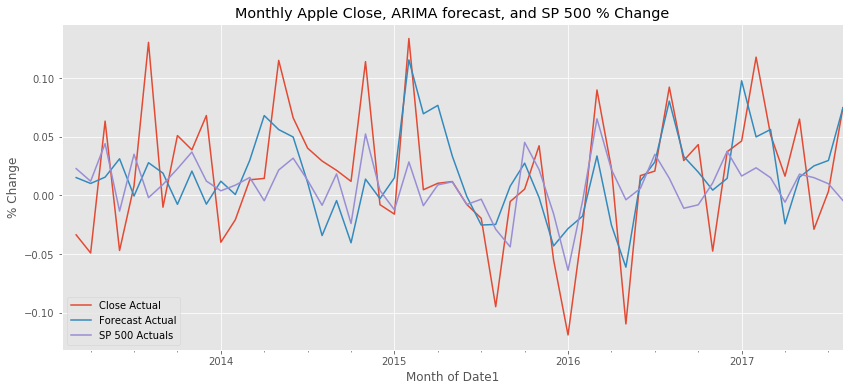

In [181]:
per_change.plot()
plt.title('Monthly Apple Close, ARIMA forecast, and SP 500 % Change')
plt.ylabel('% Change')
plt.rcParams['figure.figsize'] = (14,6)

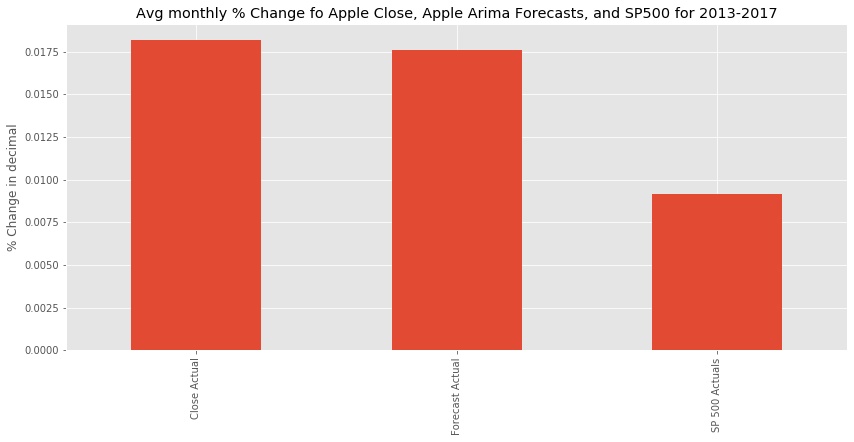

In [182]:
avg_per = per_change.mean()
plt.title('Avg monthly % Change fo Apple Close, Apple Arima Forecasts, and SP500 for 2013-2017')
plt.ylabel('% Change in decimal')
avg_per.plot(kind='bar')
plt.rcParams['figure.figsize'] = (14,6)

## Result:

In conclusion, we see our close actuals, ARIMA and SP500 in terms of average monthly growth, or average monthly % change, from which we see our Apple close has seen an average monthly growth of 1.8%, ARIMA has seen avg growth of 1.75% and SP500 has seen an averge monthly growth of about 0.9%.